<a href="https://colab.research.google.com/github/nguyetri/fine-grain-ml/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install deep learning library
pip install timm

     |████████████████████████████████| 431 kB 25.4 MB/s 


In [ ]:
# Import libraries
# Timing
import time
# Model
import timm
import torch
from matplotlib import pyplot as plt
from timm.data.transforms import RandomResizedCropAndInterpolation

# Indicate device and model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m = timm.create_model('resnet50', pretrained=True)
m.eval()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequen

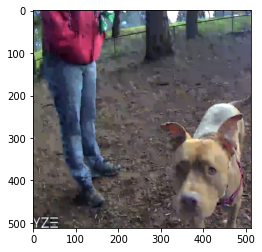

In [ ]:
import urllib
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=m)
transform = create_transform(**config)

# If fetching the test image from a url, use the format below:
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
# urllib.request.urlretrieve(url, filename)

# Mount Google drive to notebook and open image as a file
img = Image.open('/content/drive/MyDrive/ENGINE: Wyze/2_18_22_dogPark/pitbull_1.jpg').convert('RGB')
# Personal note: consider setting target_size to 512x512
plt.imshow(img)

# Randomly crop the image to 512x512
tfm = RandomResizedCropAndInterpolation(size=512)
random = tfm(img)
plt.imshow(random)

tensor = transform(img).unsqueeze(0) # transform and add batch dimension

In [ ]:
# For documentation on timing:
# https://deci.ai/resources/blog/measure-inference-time-deep-neural-networks/

from gc import enable   # for finding throughput
# latency_s = time.time() # Find latency start. Uncomment to get timing.
# Find throughput start. Uncomment to get timing.
# rep=100
# tp_total_time = 0
with torch.no_grad():
    # for rep in range(rep):
        # starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
        # starter.record()
        out = m(tensor)
        # ender.record()
        # torch.cuda.synchronize()
        # curr_time = starter.elapsed_time(ender)/1000
        # tp_total_time += curr_time
# tp = (rep*1)/ tp_total_time
# print("throughput:", tp)

# Calculates the probability of breeds with an activation function
probabilities = torch.nn.functional.softmax(out[0], dim=0)

# latency_curr_time = (time.time() - latency_s) # find latency end
# print(latency_curr_time)

print(probabilities.shape)

throughput: 6.212497877940146
15.943411588668823
torch.Size([1000])


In [ ]:
# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Print top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
# latency_s = time.time() # find latency start
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

# latency_curr_time = (time.time() - latency_s) # find latency end
# print(latency_curr_time)

American Staffordshire terrier 0.95365309715271
Staffordshire bullterrier 0.010377614758908749
Italian greyhound 0.009876000694930553
Mexican hairless 0.0033051699865609407
Ibizan hound 0.0026960682589560747
0.003393411636352539
